# Computer Vision 2020

---

## Exercise Sheet 1 - Alen Smajic (6510387)

**Due: 17. November 2020, 10am**

## 1 Introduction

In this exercise you will learn about some basic image processing operations using OpenCV.

We'll cover color spaces, basic transformations like translation or rotation, filtering—using convolution and cross correlation with the applications of blurring and de-noising—, image gradients, histogram equalization to improve contrast and thresholding as a simple means for image segmentation.

To solve the exercise you'll have to re-implement some image processing operations. This will help you to gain a better understanding of these operations and to get some practical experience working with OpenCV and NumPy.


### 1.1 Prerequisites

Before starting this exercise, you should make yourself familiar with Python and NumPy. One good tutorial can be found [here](https://cs231n.github.io/python-numpy-tutorial/). Being able to take advantage of the vast functionality offered by NumPy is paramount to solve the exercises for this assigment without spending too much time, so unless you're already familiar with NumPy, it's highly recommended to first learn about this library before starting with the exercises.

To solve the exercises, you shouldn't need to interact with Matplotlib by yourself. It should be sufficient to execute the code provided in this notebook. Nevertheless it could be helpful to attain some knowledge about Matplotlib so that you can plot intermediate results to validate your solutions.

Important functions from the OpenCV library are introduced and links to the documentation are provided.

## 2 Setup

### 2.1 Load OpenCV and NumPy

For these exercises we recommend to use at least the `OpenCV 3.x` versions. You can check your version with the statements below.

In [1]:
import cv2
import numpy as np

In [2]:
# Check OpenCV version
cv2.__version__

'4.0.1'

### 2.2 Load and configure Matplotlib for use in Jupyter notebook

We want Matplotlib figures to appear within the notebook rather than inside a separate window, so we make use of the `%matplotlib` magic function to set the [Matplotlib backend](https://matplotlib.org/tutorials/introductory/usage.html#backends) to `inline`. This way the figure appears right after the cell where the [show](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html?highlight=show#matplotlib.pyplot.show) method has been called.

In [3]:
%matplotlib inline

import matplotlib
from   matplotlib import pyplot as plt

In [4]:
# Set default color map and interpolation method for images.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

### 2.3 Define function to display images

Throughout this exercise there are numerous occasions where we want to display images. The necessary library calls to make this happen are quickly becoming repetetive, so we'll implement a utility function to take care of this.

The function creates and displays a figure of size `width` times `height`, both measured in inches. The third argument to the function is an array of tuples, where each tuple consists of an image, a title and an integer that is a valid subplot position, so that we can control where in the figure the image should appear.

In Matplotlib, the position of a subplot can be given as a three digit integer where the first digit is interpreted as the number of rows, the second as the number of columns and the third as the index, counted in row major order starting with one.

In [5]:
def render(width, height, args):
    """
    Render multiple images into a new figure.
    For each subplot provide a tuple with image, title and position.
    """
    plt.figure(figsize = (width, height))

    for img, title, position in args:

        # Create titled subplot at given position.
        plt.subplot(position)
        plt.title(title)

        # Prevent labelling of the axis.
        plt.xticks([])
        plt.yticks([])

        # Render image into current subplot.
        plt.imshow(img)

    # Display the figure.
    plt.show()

### 2.4 Define function to measure errors

To check the amount by which your solutions deviate from the implementations provided by the libraries in use, we define an error function which measures the relative difference between its arguments.

In [6]:
def error(x, y):
    """
    Calculate the sum of the relative differences.
    The absolute differences are scaled with the sum of the absolute values.
    """
    x = x.astype(np.float32)
    y = y.astype(np.float32)

    return np.sum(abs(x - y) / (abs(x) + abs(y)))

## 3 Exercises

### 3.1 Loading Images

We use the OpenCV function [imread](https://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html#cv2.imread) to read an image into a NumPy array.

The first argument of the function is an absolute or relative path to the image and the second argument is a flag, which specifies the way the image should be read. The following options to read images exist:


* IMREAD_COLOR (= 1): Loads a color image. Any transparency (alpha channel) of the image will be stripped. *This is the default.*
* IMREAD_GRAYSCALE (= 0): Loads an image in grayscale mode.
* IMREAD_UNCHANGED (= -1): Loads a color image with an alpha channel, if included.

**NOTE**: A color image read with OpenCV is in *Blue-Green-Red (BGR)* mode, but Matplotlib displays images in *RGB* mode. So color images will not be displayed correctly in Matplotlib if the image is read with OpenCV. We will see how to handle this issue in the next section.

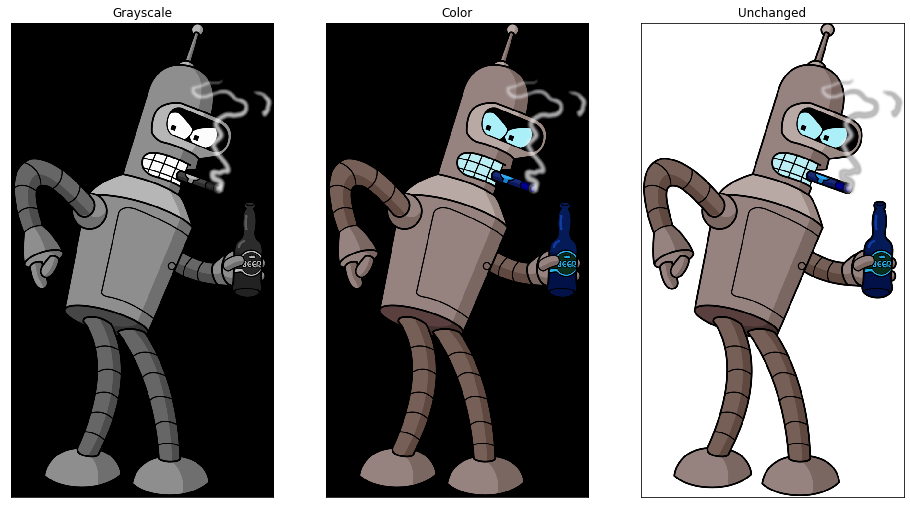

In [7]:
# Path to file.
filename = 'images/bender.png'

# Load images and render them into a figure.
render(16, 10, [
    (cv2.imread(filename, cv2.IMREAD_GRAYSCALE), 'Grayscale', 131),
    (cv2.imread(filename, cv2.IMREAD_COLOR),     'Color',     132),
    (cv2.imread(filename, cv2.IMREAD_UNCHANGED), 'Unchanged', 133)
])

#### Question (1P)

How many channels are used for these images?

#### Answer

* Grayscale: 1
* Color: 3
* Unchanged: 4

### 3.2 Color Spaces

To convert an image from one color space into another, we can use the OpenCV function [cvtColor](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.cvtcolor#cv2.cvtColor).

The function has two mandatory parameters. The first parameter is the image whose color space should be changed and the second parameter is a color space conversion code. For a full list of available codes follow the link above.

Converting between BGR and RGB color spaces can be achieved using the `COLOR_BGR2RGB` code:

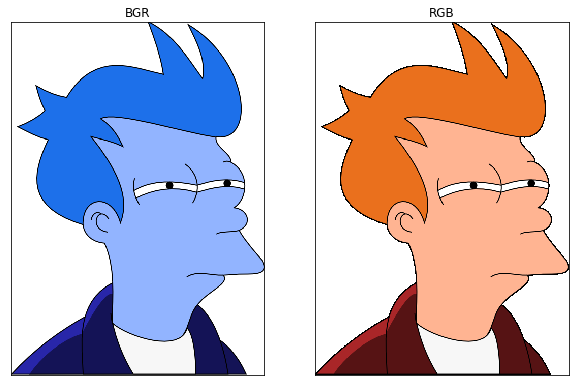

In [8]:
# Load image with transparancy.
img = cv2.imread('images/fry.png', cv2.IMREAD_UNCHANGED)

# Convert from BGR to RGB.
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Render images into a figure.
render(10, 8, [
    (img, 'BGR', 121),
    (res, 'RGB', 122)
])

#### 3.2.1 RGB to Grayscale

Grayscale values are converted from RGB values by calculating a weighted sum of the R, G and B component for each pixel as follows:

$$
    0.2989 \cdot R + 0.5870 \cdot G + 0.1140 \cdot B
$$

#### Exercise (5P)

Write a function that converts a BGR image to a grayscale image of `uint8` data type, where the resulting values are rounded to the nearest integer. Fill your code in the body of the function definition below.

#### Solution

In [9]:
def bgr2gray(img):
    """
    Convert a BGR image to a grayscale image.
    Returns an uint8 array where the converted values are rounded to the nearest integer.
    """
    ############################################################
    #                    START OF YOUR CODE                    #
    ############################################################

    out = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            out[i,j] = np.round(img[i,j,0]*0.1140 + img[i,j,1]*0.5870 + img[i,j,2]*0.2989)
            
    ############################################################
    #                     END OF YOUR CODE                     #
    ############################################################
    return out

Run the following code section to compare your implementation of the `bgr2gray` function with OpenCV function [cvtColor](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.cvtcolor#cv2.cvtColor).

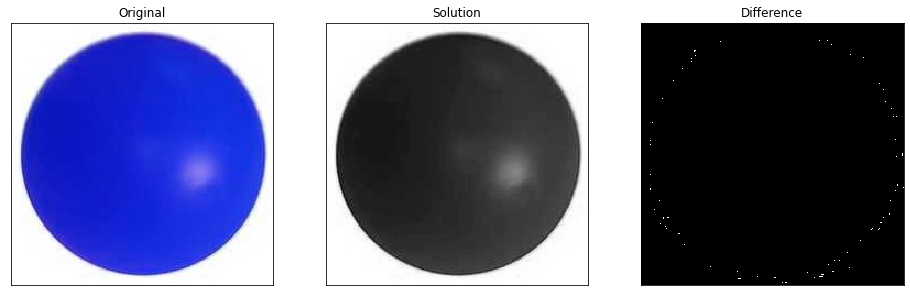

Number of different pixels is: 82


In [10]:
# Load color image.
img = cv2.imread('images/ball.jpg')

# Convert to grayscale images and store the difference between the images.
res  = bgr2gray(img)
diff = res - cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Render original, solution and difference into a figure.
render(16, 10, [
    (img,  'Original',   131),
    (res,  'Solution',   132),
    (diff, 'Difference', 133)
])

# Check how much the results differ.
print(f'Number of different pixels is: {np.count_nonzero(diff)}')

#### Question (1P)

Does your implementation of `bgr2gray` produce a result that is exactly the same as the result produced by the OpenCV built-in function? Why?

#### Answer

My implementation of bgr2gray does not produce the exact same result as the OpenCV built-in function, because the formula which was used for my implementation is not the same as the one used by OpenCV. To weight the red channel, we use the factor 0.2989, however OpenCV uses 0.299 which results in some different pixel values. 
Source: https://docs.opencv.org/4.1.2/de/d25/imgproc_color_conversions.html

#### 3.2.2 Detecting Objects by Color

Next we'll convert an image from BGR to HSV and extract objects by color. In the HSV color space, it's easier to represent a color than in the RGB or BGR color spaces. We will try to extract blue, red and yellow colored objects from an image using the following steps:

1. Convert the image from the BGR to the HSV color space.
2. Threshold the image for a color range.
3. Extract matching objects.

Before we start, we're going to have another look at the **HSV model**, though:

![HSV cylinder](images/hsv.png)

The acronym HSV stands for *Hue*, *Saturation* and *Value*.

* **Hue** represents the color, which is the angular dimension in the cylinder depicted above. Given in degrees, the ranges for primary colors are
  <br>

    *   0°-120° for <span style="color:red">**red**</span>
    * 120°-240° for <span style="color:green">**green**</span>
    * 240°-360° for <span style="color:blue">**blue**</span>

  and the ranges for secondary colors are
  <br>

    *  60°-120° for <span style="color:yellow">**yellow**</span>
    * 180°-240° for <span style="color:cyan">**cyan**</span>
    * 300°-360° for <span style="color:magenta">**magenta**</span>

  <br>
* **Saturation** represents the amount of <span style="color:gray">**gray**</span> in the color, where 0 means gray and 1 is the pure color. This is the radius of the cylinder.

* **Value** is the intensity of the color, which roughly corresponds to the color's lightness. It is the vertical axis of the cylinder.

In [11]:
# Load color image.
img = cv2.imread('images/balls.jpg')

# Convert image from BGR to HSV color space such that the colors are correct.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Define the range of blue color in the HSV color space, taking into account the type of the image data.
lower_blue = np.array([110,  50,  50])
upper_blue = np.array([130, 255, 255])

# Threshold the HSV image to get only the blue colors.
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND original image with itself using the mask.
blue = cv2.bitwise_and(img, img, mask = mask)

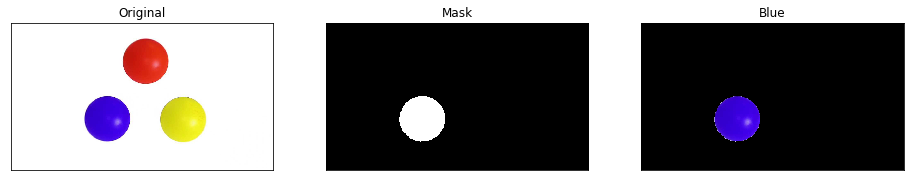

In [12]:
# Render images into a figure.
render(16, 10, [
    (img,  'Original', 131),
    (mask, 'Mask',     132),
    (blue, 'Blue',     133)
])

#### Exercise (3P)

Extract the red and yellow ball from the image and save the result in variables named `red` and `yellow`.

#### Solution

In [13]:
red = None
lower_red = np.array([0, 50, 50])
upper_red = np.array([20, 255, 255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)
lower_red = np.array([170, 50, 50])
upper_red = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red, upper_red)
mask = mask1 + mask2
red = cv2.bitwise_and(img, img, mask = mask)

yellow = None
lower_yellow = np.array([20, 50, 50])
upper_yellow = np.array([60, 255, 255])
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
yellow = cv2.bitwise_and(img, img, mask = mask)

To test your solution, you can run the following code:

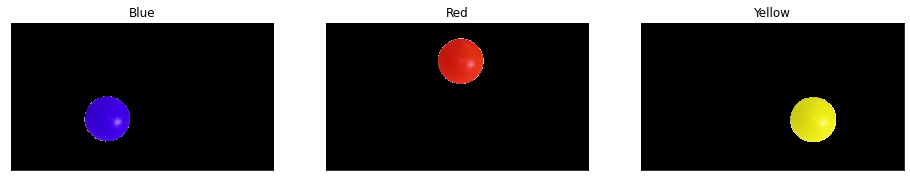

In [14]:
# Render images into a figure.
render(16, 10, [
    (blue,   'Blue',   131),
    (red,    'Red',    132),
    (yellow, 'Yellow', 133)
])

### 3.3 Transformations

#### 3.3.1 Scaling

To scale an image we can use the OpenCV function [resize](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html#cv2.resize).

The first parameter of the function is the source image and the second parameter is the size of the output image. Instead of giving the desired size of the output image directly, this mandatory parameter can be set to `None` and the named parameters `fx` and `fy` can be used to provide the scale factors for both axis.

In addition, the named parameter `interpolation` allows to select an interpolation method. By default, a bilinear interpolation method is used. There is a flag for each available method that can be found following the link above.

In [15]:
# Load color image.
img = cv2.imread('images/logo.png')

# Get image size.
height, width, _ = img.shape

# The following calls to resize are equivalent:
res = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
res = cv2.resize(img, (2*width, 2*height),  interpolation = cv2.INTER_CUBIC)

# Check if result is correct.
all(r == 2*i for r, i in zip(res.shape[:2], img.shape[:2]))

True

#### Exercise (3P)

Scale the image such that the smaller side is 500 and the aspect ratio of the image is best preserved. Store the result in the `res` variable.

#### Solution

In [16]:
res = None

height, width, _ = img.shape

if width > height:
    width = int(np.round(500*(width/height)))
    height = 500
    dim = (width, height)
    res = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
elif height > width:
    height = int(np.round(500*(height/width)))
    width = 500
    dim (width, height)
    res = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
elif height == width:
    dim = (500, 500)
    res = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
    
#Proof
print(img.shape)
print(res.shape)
print(428/378)
print(566/500)

(378, 428, 3)
(500, 566, 3)
1.1322751322751323
1.132


#### 3.3.2 Translation

Translation is the shifting of an object's location. Supposed we know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, then we can create the transformation matrix $M$ as follows:

$$
    M =
    \begin{bmatrix}
        1 & 0 & t_x \\
        0 & 1 & t_y
    \end{bmatrix}
$$

We can translate an image by passing the image and the transformation matrix $M$ as a NumPy array to the OpenCV function [warpAffine](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.warpaffine#cv2.warpAffine), which generally can be used to apply affine transformations to an image.

This function has three mandatory parameters. The first one is the source image, the second is the transformation matrix and the third is the desired size of the output image. Check the linked documentation of the function to see what other options are available.

**NOTE**: The data type of the array representing $M$ must be `float32` or `float64`.

In [17]:
# Read and convert color image.
img = cv2.cvtColor(cv2.imread('images/enterprise.png'), cv2.COLOR_BGR2RGB)

# Get image size.
h, w, _ = img.shape

# Define transformation matrix to shift the image left and up by 100.
M = np.float32([
    [1, 0, -100],
    [0, 1, -100]
])

# Apply the transformation.
res1 = cv2.warpAffine(img, M, (w, h))

#### Exercise (3P)

If you execute the two code cells below, you'll recognize that in the shifted image, the saucer section of the Enterprise is cropped. Change the arguments for the following call to `warpAffine`, **except the first and the second**, such that the Enterprise appears in the center of the third image.

#### Solution

In [19]:
res2 = cv2.warpAffine(img, M, (w+200, h+200), flags=cv2.WARP_INVERSE_MAP)

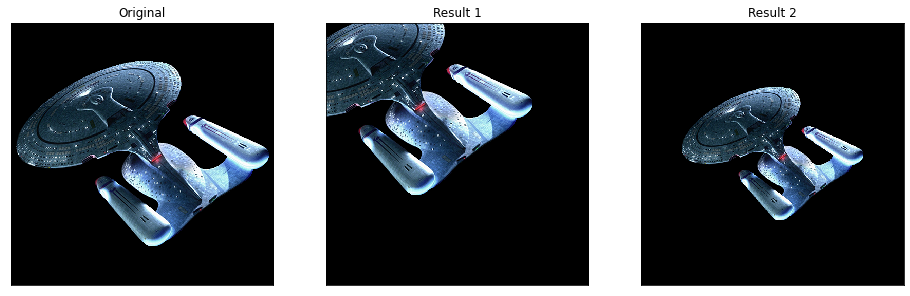

In [20]:
# Render images into a figure.
render(16, 10, [
    (img,  'Original', 131),
    (res1, 'Result 1', 132),
    (res2, 'Result 2', 133)
])

#### 3.3.3 Rotation

The `warpAffine` function described in the previous section is used for rotations, too. We don't have to create the transformation matrix by hand, though. Instead, we can use the OpenCV function [getRotationMatrix2D](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.getrotationmatrix2d#cv2.getRotationMatrix2D) to calculate an affine matrix for 2D rotation.

The function has three parameters:

1. The *center* of the rotation in the image.
2. The rotation *angle* in degrees, where positive values mean counter-clockwise rotation.
3. The *scale factor*, that is uniformly applied to both dimensions of the image.

In [21]:
# Load color image
img = cv2.imread('images/logo.png')

# Get image size.
h, w, _ = img.shape

#### Exercise (2P)

Run the two code cells below and observe the rotated image. Modify the arguments passed to `warpAffine` and/or `getRotationMatrix2D` other than the source image, such that the rotated image has no black padding.

#### Solution

In [22]:
res = cv2.warpAffine(img, cv2.getRotationMatrix2D((w/2, h/2), 90, 1), (w, h), borderValue=(255,255,255))

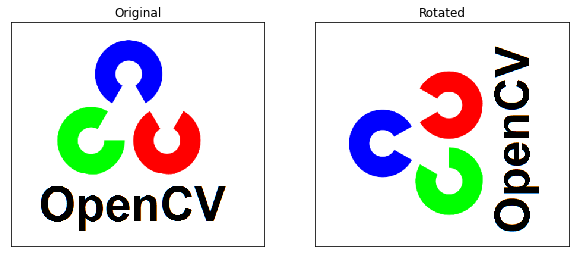

In [23]:
# Render images into a figure.
render(10, 8, [
    (img, 'Original', 121),
    (res, 'Rotated',  122)
])

### 3.4 Image Filtering

#### 3.4.1 Convolution/Cross Correlation

To apply a linear filter to an image we can use the OpenCV function [filter2D](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.filter2d#cv2.filter2D). The function uses *cross correlation* to compute the filter operation. The OpenCV function [flip](https://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html#void%20flip(InputArray%20src,%20OutputArray%20dst,%20int%20flipCode)) can be used to turn this into an actual *convolution* operation, if desired.

To understand the convolution of an image with a filter, it can be easier to first take a look at cross correlation, since these operations in this context are basically the same, except that for convolution one has to flip the filter along both axis.

After using cross correlation, every pixel in the correlated image is a linear combination, that is a weighted sum, of the corresponding pixel in the source image and pixels in some *neighborhood* of that pixel, where the weights are the components of the filter.

So, if we let $F \in \mathbb{R}^{5 \times 5}$ be a filter and $x^\prime \in \mathbb{R}^{5 \times 5}$ be a slice of some matrix $x \in \mathbb{R}^{m \times n}$ with $m, n \in \mathbb{N}_{\geq 5}$ representing an image, the pixel $x_{i,j}$ in the center of $x^\prime$ would be mapped to

$$
    \sum_{k = -2}^2 \sum_{l = -2}^2 F_{2+k, 2+l} \cdot x_{i+k, j+l}
$$

assuming indices starting with zero rather than one.

#### Exercise (15P)

Implement the convolution/cross correlation operation for images with *one* channel. Fill your code in the function definition below.

#### Solution

In [24]:
def filter2D(x, F, pad=1, stride=1, conv=False):
    """
    Apply linear filter F to an image x with one channel.
    The output is calculated using cross correlation or convolution, depending on the parameters.
    The data type of the input image is preserved.

    Input:
        - x:      Grayscale image.
        - F:      Filter.
        - pad:    Number of pixels that will be used to zero-pad the input.
        - stride: Number of pixels between adjacent receptive fields in the horizontal and vertical directions.
        - conv:   Flag to use convolution for the filter operation.

    Output:
        - out:    Result of the filter operation.

    """

    # Flip kernel to perform convolution instead of cross correlation if requested.
    if conv:
        F = cv2.flip(F, -1)

    # Get sizes.
    hx, wx = x.shape
    hF, wF = F.shape

    # Add uniform zero padding to the input.
    x = np.pad(x, pad, 'constant')

    ############################################################
    #                    START OF YOUR CODE                    #
    ############################################################
    
    # Calculate output dimensions.
    h = ((hx + 2*pad) - 2*(hF//2) - 1) // stride + 1
    w = ((wx + 2*pad) - 2*(wF//2) - 1) // stride + 1

    # Create output array.
    out = None
    out = np.zeros((h,w))
    
    w_factor = wF // 2
    h_factor = hF // 2
    
    for i in range(h):
        for j in range(w):
            for k in range(-h_factor, h_factor+1):
                for l in range(-w_factor, w_factor+1):
                    out[i,j] += F[h_factor+k, w_factor+l] * x[i*stride + k + h_factor, j*stride + l + w_factor] 
                
                    
    ############################################################
    #                     END OF YOUR CODE                     #
    ############################################################
    return out

To test your implementation you can run the following code:

In [25]:
# Define shapes of example input image and filter.
x_shape = (5, 5)
F_shape = (3, 3)

# Sample evenly distributed values in the given ranges.
x = np.linspace(-.1, .5, num = np.prod(x_shape)).reshape(x_shape)
F = np.linspace(-.2, .3, num = np.prod(F_shape)).reshape(F_shape)

# Use your implementation to calculate the filter operation.
res = filter2D(x, F)

# Calculate and print the difference between your result and the correct result.
diff = error(res, np.array([
    [.0075,     .030625,  .0521875,  .07375,   .0475   ],
    [.114375,   .1725,    .18375,    .195,     .10875  ],
    [.1753125,  .22875,   .24,       .25125,   .1228125],
    [.23625,    .285,     .29625,    .3075,    .136875 ],
    [.0075,    -.05375,  -.0603125, -.066875, -.1025   ]
]))

print('Difference:', diff)

Difference: 0.0


#### 3.4.2 Averaging Filter

To blur an image, we can convolve it with a *box filter*. Every pixel in the output image is then the average of the corresponding source pixel and its neighbors, as covered by the kernel (the filter matrix).

The kernel for a normalized $5 \times 5$ box filter would look like this:

$$
    K = \frac{1}{25}
    \begin{bmatrix}
        1 & 1 & 1 & 1 & 1 \\
        1 & 1 & 1 & 1 & 1 \\
        1 & 1 & 1 & 1 & 1 \\
        1 & 1 & 1 & 1 & 1 \\
        1 & 1 & 1 & 1 & 1
    \end{bmatrix}
$$

#### Exercise (2P)

Implement the kernel depicted above. Transform the array stored in the `kernel` variable and don't use a loop.

#### Solution

In [26]:
kernel = np.zeros((5, 5), np.float32)

kernel = np.ones((5,5), np.float32)*(1/25)
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


You can check your implementation with the following code. Note though, that the results of these function calls are not expected to be equal.

In [27]:
# Convert color image to grayscale.
img = cv2.cvtColor(cv2.imread('images/text.png').astype(np.float32), cv2.COLOR_BGR2GRAY)

# Apply the kernel to the image.
avg = cv2.filter2D(img, -1, kernel)

# The above code can be replaced by the following code line.
avg_builtin = cv2.blur(img, (5, 5))

# Display the difference between the results of the two functions.
print('Difference:', error(avg, avg_builtin))

Difference: 0.0060617607


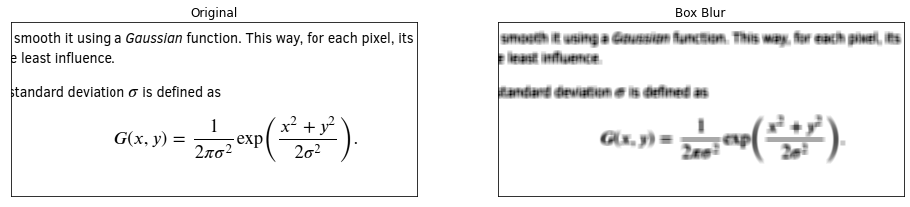

In [28]:
# Render images into a figure.
render(16, 8, [
    (img, 'Original', 121),
    (avg, 'Box Blur', 122)
])

#### 3.4.3 Gaussian Blur

Another possibility to blur an image is to smooth it using a *Gaussian* function. This way, for each pixel, its nearest neighbors have the most influence, whereas the pixels farthest away have the least influence.

The bivariate Gaussian distribution with standard deviation $\sigma$ is defined as

$$
    G(x, y) = \frac{1}{2 \pi \sigma^2} \exp\left(\frac{x^2 + y^2}{2 \sigma^2}\right).
$$

#### Exercise (5P)

Create a $5 \times 5$ Kernel for a Gaussian blur. Use the OpenCV function [getGaussianKernel](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.filter2d#getgaussiankernel) to create a vector shaped kernel first. Just as the box filter, the Gaussian is *separable*. Take advantage of this property and store the result in a variable named `kernel`.

#### Solution

In [29]:
kernel = None
gaussian_vector = cv2.getGaussianKernel(5, 1.0)
kernel = np.multiply(gaussian_vector, gaussian_vector.T)
print(kernel)

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


You can check your implementation with the following code. Note though, that the results of these function calls are not expected to be equal.

In [30]:
# Convert image data type from uint8 to float32.
img = cv2.cvtColor(cv2.imread('images/text.png').astype(np.float32), cv2.COLOR_BGR2GRAY)

# Apply the kernel to the image.
gaussian = cv2.filter2D(img, -1, kernel)

# The above codes can be replaced by the following code line.
gaussian_builtin = cv2.GaussianBlur(img, (5, 5), 1)

# Display the difference between the results of the two functions.
print('Difference:', error(gaussian, gaussian_builtin))

Difference: 0.0060338113


The use of the OpenCV function [GaussianBlur](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.filter2d#void%20GaussianBlur(InputArray%20src,%20OutputArray%20dst,%20Size%20ksize,%20double%20sigmaX,%20double%20sigmaY,%20int%20borderType)) is recommended. It is expected to be faster, because it applies a one dimensional kernel in two passes instead of a two dimensional kernel in one pass, which which saves a significant amount of operations.

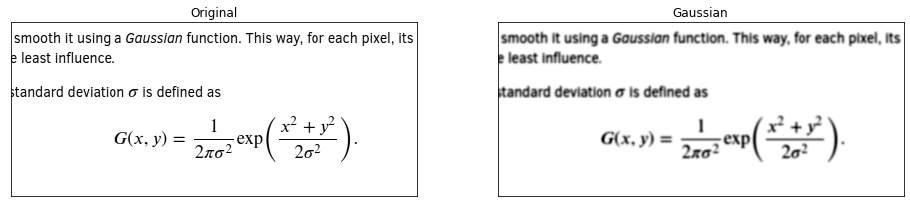

In [31]:
# Render images into figure for comparsion.
render(16, 8, [
    (img,      'Original', 121),
    (gaussian, 'Gaussian', 122)
])

#### 3.4.4 Median Filter

Given an ordered set $X$ of $n$ values, the *median* $m$ is the value that separates the lower from the higher half. If $\lvert X \rvert$ is odd, then $m \in X$ is the value in the middle. Otherwise there is a pair of values in the middle, leaving different options to define the median for the set.

The most common definition is to use the *mean* of the two numbers in the middle:

$$
    \mathrm{m}(X) =
    \frac{1}{2}
    \left(
        X_{\left\lfloor (n + 1)/2 \right\rfloor} +
        X_{\left\lceil  (n + 1)/2 \right\rceil}
    \right)
$$

Another possibility is to always choose the *lower* of the two values.

#### Exercise (5P)

Implement a function to calculate the median from an array, using **the second variant** when dealing with even sized inputs. The function should also work on arrays whose rank is higher than one. Fill your code in the body of the function definition provided below.

#### Solution

In [49]:
def median(x):
    """
    Calculate the median of the given array.
    If the number of elements is even, return the lower of the elements in the middle.
    """
    ############################################################
    #                    START OF YOUR CODE                    #
    ############################################################
    out = None
    
    x = x.flatten()
    x = np.sort(x)

    amount = x.shape[0]
    
    if amount%2 == 0:
        out = x[amount//2 - 1]
    else:
        out = x[amount//2]
    

    ############################################################
    #                     END OF YOUR CODE                     #
    ############################################################
    return out

To blur an image with a median filter we can use the OpenCV function [medianBlur](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.filter2d#medianblur).

The function has two mandatory parameters. The first parameter is the source image and the second parameter is the size of the filter, which must be an odd integer.

This type of filter proves particularly useful for removing noise from images. To test this property, we implement a utility function that allows us to add salt and pepper noise to grayscale images.

In [39]:
def noise(x, spread):
    """
    Add salt and pepper noise to the given image.
    The amount of noise can be controlled using the second parameter.
    """
    x = x.astype(np.float32) / 255

    # Generate the noise.
    n = np.random.randint(spread, size = x.shape)
 
    # Add the noise to the image taking into account the different interval boarders.
    x  = np.where(n == 0,        0, x)
    x  = np.where(n == spread-1, 1, x)

    x *= 255

    return x.astype(np.uint8)

To see how it works, execute the following cell. Increasing the second parameter reduces the noise and vice versa.

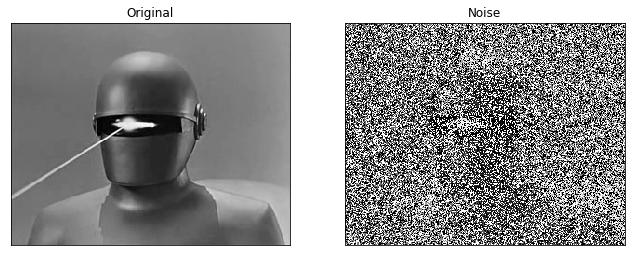

In [40]:
# Load grayscale image.
img = cv2.imread('images/gort.jpg', cv2.IMREAD_GRAYSCALE)

# Add rather dense noise to the image.
noisy = noise(img, 3)

# Show the result.
render(11, 5, [
    (img,   'Original', 121),
    (noisy, 'Noise',    122)
])

Now, observe the results of running the following code section.

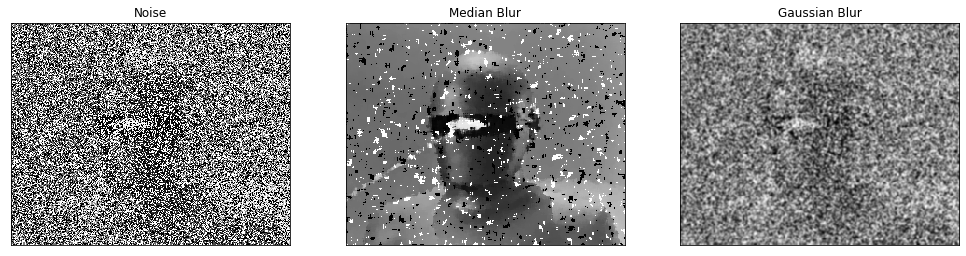

In [44]:
# Apply median and gaussian blur to the image.
median   = cv2.medianBlur(noisy, 5)
gaussian = cv2.GaussianBlur(noisy, (5, 5), 1)

# Render images for comparsion.
render(17, 10, [
    (noisy,    'Noise',         131),
    (median,   'Median Blur',   132),
    (gaussian, 'Gaussian Blur', 133)
])

#### Exercise (5P)

Comment on the effectiveness of the *median filter* and the *Gaussian filter* for the example above. Provide an explanation for the different results.

#### Solution

The median filter is basically much more effective in removing the noise than the Gaussian filter. The reason for this is, that the median filter is much more robust against outliers (values that are extremly different than the others in the neighbourhood). If we add some extreme noise values to the image, since the filter uses the median value as the output, the extreme noise values will be ignored with very high probability. However in the Gaussian filter, every pixel value affects the output. So if we add some extremely noisy values, the output will be directly affected by this which results in a nosier image. The downside of median filter is, that its more computationally-intensive and the image is less sharp (more smooth) than the one with the Gaussian filter (for the human eye).

#### Exercise (10P)

Implement a median blur filter by yourself. Fill your code in the function definition below.

Note, that it is **not required** that your filter produces *exactly* the same results as the built-in filter provided by the OpenCV library. Nevertheless, the outputs should be very similar.

#### Solution

In [47]:
def medianBlur(x, size):
    """
    Blur a grayscale image with a median filter.
    The given size for the kernel must be an odd integer.
    """
    ############################################################
    #                    START OF YOUR CODE                    #
    ############################################################
    out = np.zeros_like(x)
    
    radius = size//2

    x = np.pad(x, radius, 'constant')

    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i,j] = median(x[i:i+size,j:j+size])

    ############################################################
    #                     END OF YOUR CODE                     #
    ############################################################
    return out

Run the following code to compare your implementation to `medianBlur` of OpenCV.

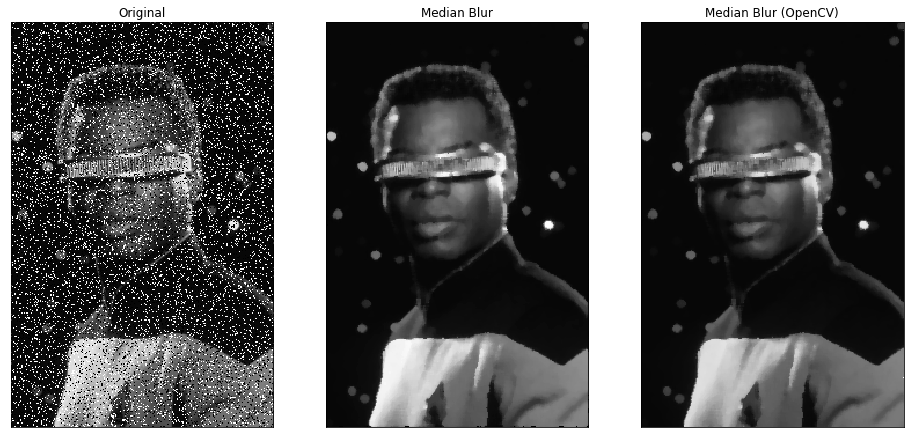

In [50]:
# Load grayscale image and add noise.
img = noise(cv2.imread('images/geordi.jpg', cv2.IMREAD_GRAYSCALE), 10)

# Blur image with your function and the built-in filter.
median = medianBlur(img, 5)
median_builtin = cv2.medianBlur(img, 5)

# Blur images and display the source image and the results for comparsion.
render(16, 8, [
    (img,            'Original',             131),
    (median,         'Median Blur',          132),
    (median_builtin, 'Median Blur (OpenCV)', 133)
])

### 3.5 Image Gradient

#### 3.5.1 One Direction

For a 1D *continuous* function $f(x)$ the gradient corresponds to the derivative.

<br>

$$
    \frac{d}{dx} f(x) =
    \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x} \:\: \mathrm{or} \:\:
    \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x}
$$

<br>

For a 1D *discrete* function $f[n]$ on the other hand, we can approximate the gradient/derivative as follows:

<br>

$$
    f[n + 1] - f[n] \:\: \mathrm{or} \:\: \frac{f[n + 1] - f[n - 1]}{2}
$$

<br>

The kernel to find the gradient of a 1D discrete function to be used with correlation is $[-1, 0, 1]$.

#### Exercise (5P)

Create a 3x3 kernel, `Kx`, to find the gradient in the x-axis of an image.

#### Solution

In [40]:
Kx = None
Kx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

Run the following code to test the kernel.

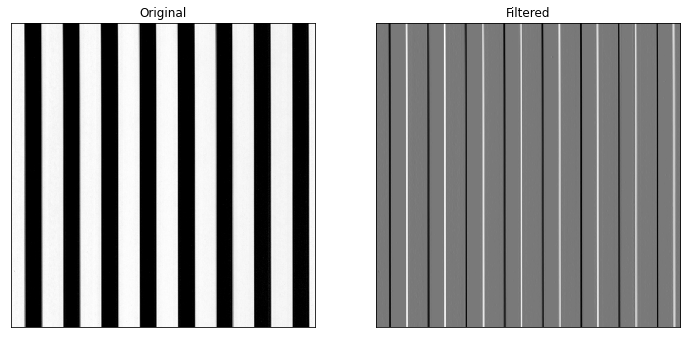

In [41]:
# Load grayscale image.
img = cv2.imread('images/banded_vertical.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32) 

# Apply kernel to image.
dx = cv2.filter2D(img, -1, Kx)

# Display images for comparsion.
render(12, 10, [
    (img, 'Original', 121),
    (dx,  'Filtered', 122)
])

#### Exercise (5P)

Create a 3x3 kernel, `Ky`, to find the gradient in the y-axis of an image.

#### Solution

In [7]:
Ky = None
Ky = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

Run the following code to test the kernel.

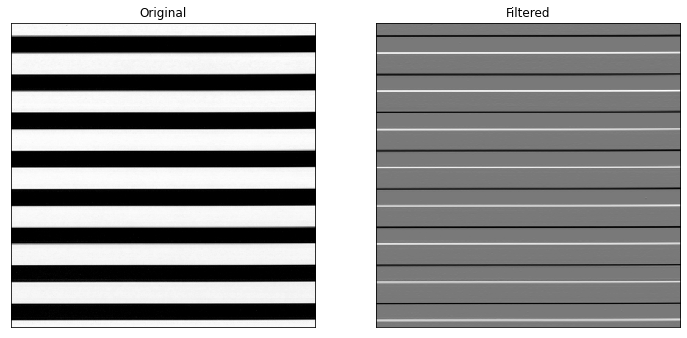

In [8]:
# Load grayscale image.
img = cv2.imread('images/banded_horizontal.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32) 

# Apply kernel to image.
dy = cv2.filter2D(img, -1, Ky)

# Display images for comparsion.
render(12, 10, [
    (img, 'Original', 121),
    (dy,  'Filtered', 122)
])

#### Question (2P)

What do the kernels `Kx` and `Ky` do in image processing?

#### Answer

The kernels Kx and Ky are used to detect vertical and horizontal edges. 
For vertical edge detection this is done by detecting big differences between pixel values in a horizontal neighborhood and for horizontal edge detection vice versa. In fact the kernels are computing the gradient of a 2D discrete function. If the gradient is big, this means there is a big difference in the pixel values which is representing an edge in the image. Edges are significant changes in intensity values. The kernel Kx is only able to detect vertical edges and the kernel Ky is only able to detect horizontal edges. If we would switch them on the pictures above, we would get no edge detection.

#### 3.5.2 Two Directions

To approximate the gradient in x and y direction, we calculate the following differences:

<br>

$$
\begin{align}
    G_x[m, n] & = G_x[m + 1, n] - G_x[m - 1, n] \\
    G_y[m, n] & = G_y[m, n + 1] - G_y[m, n - 1]
\end{align}
$$

<br>

We can use these approximations to calculate the *magnitude* of the gradient for each pixel in an image, using the $L^2$ norm

<br>

$$
    \left\Vert G[m, n] \right\Vert = \sqrt{G_x^2[m, n] + G_y^2[m, n]},
$$

<br>

and also the *direction* of the gradient

$$
    \measuredangle G[m, n] = \tan^{-1}{\frac{G_y[m, n]}{G_x[m, n]}}.
$$

#### Exercise (10P)

Using the theory provided above, compute the magnitude of the bidirectional image gradient. Store the result in the `mag` variable.

#### Solution

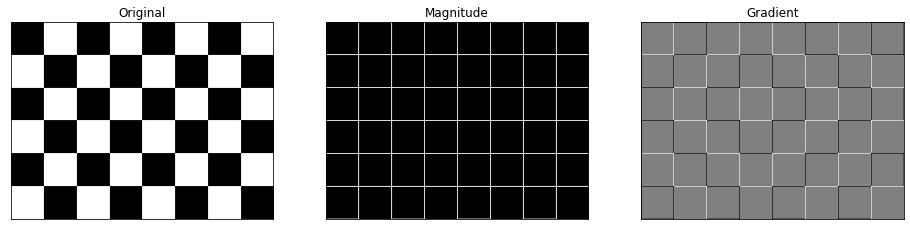

In [10]:
# Load grayscale image and convert to floating point.
img = cv2.imread('images/chequered.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32)

############################################################
#                    START OF YOUR CODE                    #
############################################################
mag = None
mag = np.zeros((img.shape[0], img.shape[1]))

for i in range(mag.shape[0]-1):
    for j in range(mag.shape[1]-1):
        g_x = (img[i+1,j] - img[i-1,j])
        g_y = (img[i,j+1] - img[i,j-1])
        mag[i,j] = np.sqrt(g_x**2 + g_y**2)

############################################################
#                     END OF YOUR CODE                     #
############################################################

# Your solution should resemble the image gradient.
K = np.float32([
    [0,  1,  0],
    [1, -4,  1],
    [0,  1,  0]
])

grad = cv2.filter2D(img, -1, K)

# Display source image and both outputs for comparsion.
render(16, 10, [
    (img,  'Original',  131),
    (mag,  'Magnitude', 132),
    (grad, 'Gradient',  133)
])

### 3.6 Histogram Equalization

An image histogram is a graphical representation of the intensity distribution of an image. It quantifies the number of pixels for each intensity value considered.

Histogram equalization means that one intensity distribution is mapped to another distribution that is more uniform, such that the intensity values are spreaded over the full range. This has the effect that the contrast of the image is increased.

More detailed explanations of histogram equalization can be found on [Wikipedia](https://en.wikipedia.org/wiki/Histogram_equalization) and in this [OpenCV tutorial](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html), also introducing the function [equalizeHist](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/histograms.html?highlight=equalizehist#cv2.equalizeHist), which can be used to perform this operation as shown in the following example.

In [8]:
# Load grayscale image.
img = cv2.imread('images/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization to the image.
img_eq = cv2.equalizeHist(img)

# Calculate the normalized cumulative distribution function (CDF) for the original and the equalized image.
img_cdf    = np.cumsum(np.histogram(img,    256, (0., 255.))[0])*255 / np.prod(img.shape)
img_eq_cdf = np.cumsum(np.histogram(img_eq, 256, (0., 255.))[0])*255 / np.prod(img.shape)

Besides the already known `imshow` function, we're going to use Matplotlib's [hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) and [plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot) functions to show the results of the above computations.

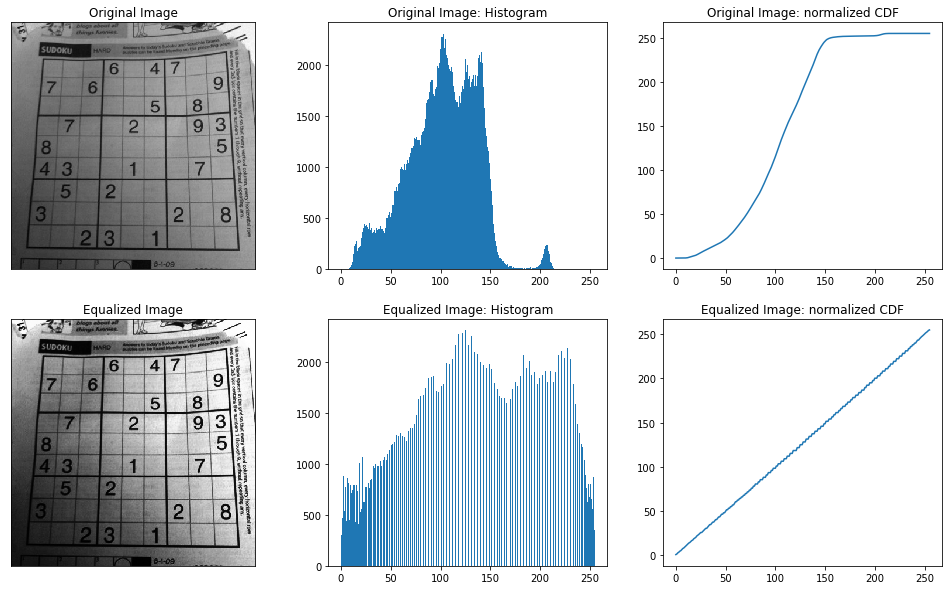

In [9]:
# Create large figure.
plt.figure(figsize = (17, 10))

# Plot the images.
plt.subplot(231), plt.imshow(img),    plt.xticks([]), plt.yticks([]), plt.title('Original Image')
plt.subplot(234), plt.imshow(img_eq), plt.xticks([]), plt.yticks([]), plt.title('Equalized Image')

# Plot the histograms.
plt.subplot(232), plt.hist(np.ravel(img),    256, (0., 255.)), plt.title('Original Image: Histogram')
plt.subplot(235), plt.hist(np.ravel(img_eq), 256, (0., 255.)), plt.title('Equalized Image: Histogram')

# Plot the normalized CDFs.
plt.subplot(233), plt.plot(range(256), img_cdf),    plt.title('Original Image: normalized CDF')
plt.subplot(236), plt.plot(range(256), img_eq_cdf), plt.title('Equalized Image: normalized CDF')

# Display the figure.
plt.show()

#### Exercise (10P)

Implement the histogram equalization function for grayscale images. Fill your code in the function definition below.

#### Solution

In [11]:
def equalizeHist(x):
    """
    Calculate histogram equalization for the input image.
    The input must be a grayscale image.
    """
    ############################################################
    #                    START OF YOUR CODE                    #
    ############################################################
    out = np.zeros_like(x)
    
    histogram = np.histogram(x, 256, (0.,255.))[0]
    cummulative_histogram = np.cumsum(histogram)
    
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i,j] = 255 * ((cummulative_histogram[x[i,j]] - np.min(cummulative_histogram[np.nonzero(cummulative_histogram)])) / (np.prod(x.shape) - np.min(cummulative_histogram[np.nonzero(cummulative_histogram)]))) 
            
    ############################################################
    #                     END OF YOUR CODE                     #
    ############################################################
    return out

You can verify the correctness of your implementation by plotting the histogram and the normalized CDF of the equalized image.

**NOTE**: It is *not required* that your implementation returns an image that is exactly the same as the one returned by OpenCV's build-in function. However, the normalized CDF should make sense.

In [12]:
# Load grayscale image.
img = cv2.imread('images/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

# Equalize image.
res = equalizeHist(img)

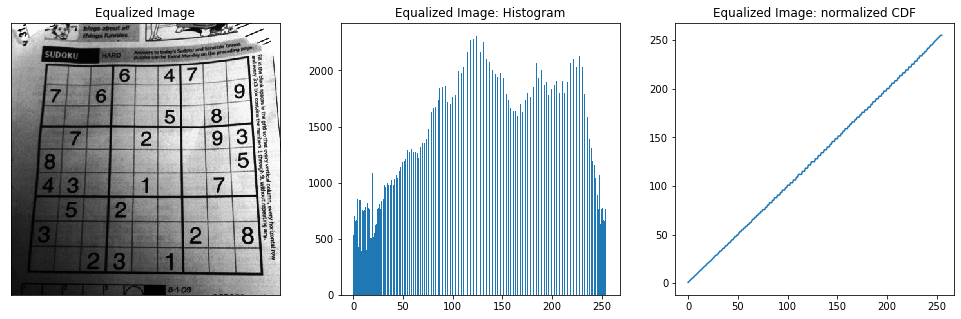

In [13]:
# Create large figure.
plt.figure(figsize = (17, 5))

# Plot equalized image.
plt.subplot(131)
plt.xticks([]), plt.yticks([]), plt.imshow(res)
plt.title('Equalized Image')

# Plot histogram of equalized image.
plt.subplot(132)
plt.hist(np.ravel(res), 256, (0., 255.))
plt.title('Equalized Image: Histogram')

# Plot normalized CDF of equalized image.
plt.subplot(133)
plt.plot(range(256), np.cumsum(np.histogram(res, 256, (0., 255.))[0])*255 / np.prod(img.shape))
plt.title('Equalized Image: normalized CDF')

# Display the figure.
plt.show()

### 3.7 Image Thresholding

Image thresholding is a method to separate pixels of an input image to different classes. What should be the criteria for separating pixels?

#### 3.7.1 Estimating Threshold using Image Histograms

Let's start with a simple example taking an image with two clear classes. A simple technique is to define a threshold for the image intensity below which the pixels should belong to the class "foreground" and above to the class "background".

In the following example we'll try to find out whether it's trivial to find the correct threshold using an image histogram.

In [12]:
# Load grayscale image.
img1 = cv2.imread('images/bimodal.jpg',           cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/bimodal_hsv_noise.png', cv2.IMREAD_GRAYSCALE)

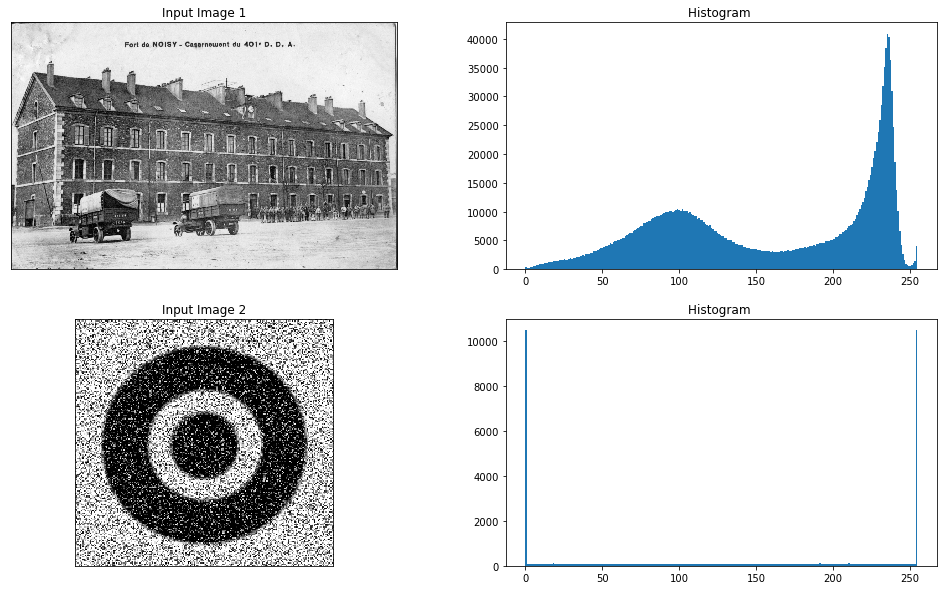

In [13]:
# Create large figure.
plt.figure(figsize = (17, 10))

# Plot image 1.
plt.subplot(221)
plt.xticks([]), plt.yticks([]), plt.imshow(img1)
plt.title('Input Image 1')

# Plot histogram of image 1.
plt.subplot(222)
plt.hist(np.ravel(img1), 256, (0., 255.))
plt.title('Histogram ')

# Plot image 2.
plt.subplot(223)
plt.xticks([]), plt.yticks([]), plt.imshow(img2)
plt.title('Input Image 2')

# Plot histogram of image 2.
plt.subplot(224)
plt.hist(np.ravel(img2), 256, (0., 255.))
plt.title('Histogram ')

# Display the images.
plt.show()

#### Exercise (3P)

By observing the histogram above, can you see find a threshold to separate the foreground from the background for both images? If so, assign the thresholds to the variables below.

#### Solution

In [14]:
th_img1 = 170
th_img2 = 50

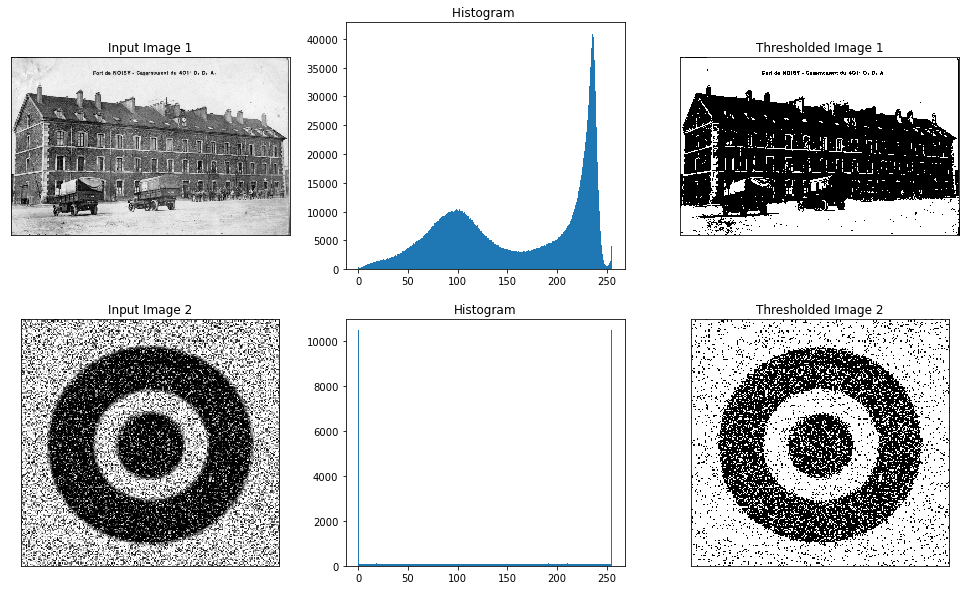

In [15]:
# Create large figure.
plt.figure(figsize = (17, 10))


# Plot image 1.
plt.subplot(231)
plt.xticks([]), plt.yticks([]), plt.imshow(img1)
plt.title('Input Image 1')

# Plot histogram of image 1.
plt.subplot(232)
plt.hist(np.ravel(img1), 256, (0., 255.))
plt.title('Histogram ')

# Threshold image 1
ret, th1 = cv2.threshold(img1, th_img1, 255, cv2.THRESH_BINARY)

# Plot image 1 thresholded.
plt.subplot(233)
plt.xticks([]), plt.yticks([]), plt.imshow(th1)
plt.title('Thresholded Image 1')


# Plot image 2.
plt.subplot(234)
plt.xticks([]), plt.yticks([]), plt.imshow(img2)
plt.title('Input Image 2')

# Plot histogram of image 2.
plt.subplot(235)
plt.hist(np.ravel(img2), 256, (0., 255.))
plt.title('Histogram')

# Threshold image 2
ret, th2 = cv2.threshold(img2, th_img2, 255, cv2.THRESH_BINARY)

# Plot image 2 thresholded.
plt.subplot(236)
plt.xticks([]), plt.yticks([]), plt.imshow(th2)
plt.title('Thresholded Image 2')


# Display the images.
plt.show()

#### Exercise (5P)

Were you able to separate foreground with background in image 2? If not, why ?
Can you apply a method that you learned in the previous exercises and then apply the thresholding to achieve a better result?

Answer:
I was not able to separate the foreground with the backround in image 2 since this image has a lot of noise in the background as well as in the foreground. The thresholding algorithm separates the two classes and in doing so it takes also the noise in the wrong classes. To overcome this, we have to apply an aggresive filter like median smoothing to reduce the noise in the image. In doing so, we actually help the algorithm to separate the foreground and the background and to produce a clear image. The black foreground is loosing its white noise and becoming more black while the white background is loosing its black noise and becoming more white. This helps the thresholding algorithm to make a clear separation between the two classes.

#### Solution

In [59]:
# Apply some known method to the image to obtain better thresholding.
modified = cv2.medianBlur(img2,7)

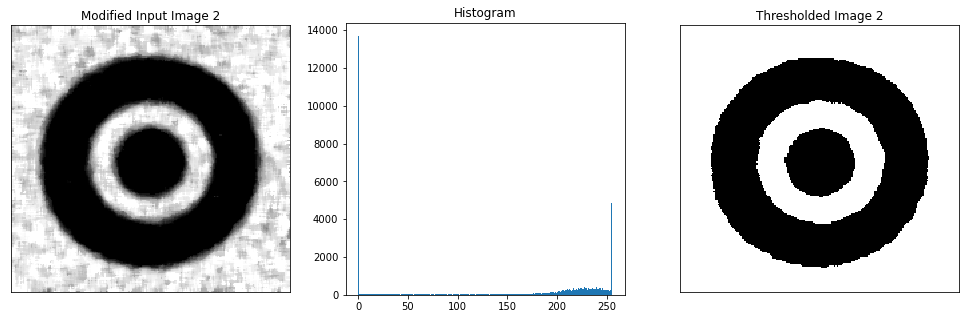

In [60]:
# Create large figure.
plt.figure(figsize = (17, 5))

# Plot modified image.
plt.subplot(131)
plt.xticks([]), plt.yticks([]), plt.imshow(modified)
plt.title('Modified Input Image 2')

# Plot histogram of image 2.
plt.subplot(132)
plt.hist(np.ravel(modified), 256, (0., 255.))
plt.title('Histogram')

# Threshold image 2
ret, th2 = cv2.threshold(modified, th_img2, 255, cv2.THRESH_BINARY)

# Plot image 2 thresholded.
plt.subplot(133)
plt.xticks([]), plt.yticks([]), plt.imshow(th2)
plt.title('Thresholded Image 2')

# Display the images.
plt.show()

### 3.7.2 Advanced Techniques

#### Optimal Threshold 

In the above examples we set the thresholds by manually observing the histograms. Otsu's thresholding is an algorithm to find the optimum threshold. The Multi-Otsu technique further allows us to calculate several thresholds determined by the number of classes. You can read about Multi-Otsu optimization [here](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html), and a recent paper published this year on generalized Otsu's thresholding can be found [here](https://arxiv.org/pdf/2007.07350.pdf).

#### Adaptive Thresholding

In the exercises above we applied a global threshold to all the pixels. Adaptive thresholding methods find thresholds for a local neighborhood of pixels. You can read more about them [here](https://scikit-image.org/docs/0.12.x/auto_examples/segmentation/plot_threshold_adaptive.html).

#### Foreground-Background Separation

These days, to separate the pixels into distinct classes, the thresholding methods are rarely used. Deep learning based semantic segmentation methods are current state of the art methods for assigning pixels to different classes. You can find some examples [here](https://github.com/facebookresearch/detectron2).